Predicted [Price, Occupants]:
[[ 58.33769784   2.67454055]
 [116.18701947   4.78854055]]

Actual [Price, Occupants]:
[[ 55   3]
 [110   5]]

Mean Squared Error: 12.392518947875915

For New House [1600 sq ft, 4 rooms]:
Predicted House Price (lakhs): 90.4
Predicted Number of Occupants: 4


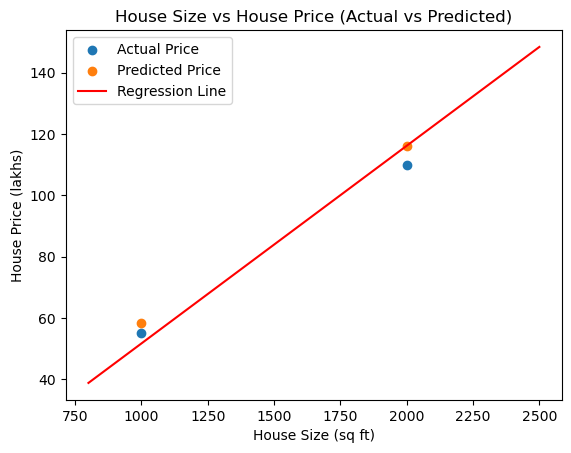

In [10]:

import numpy as np
from sklearn.linear_model import SGDRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

X = np.array([
    [800, 2],
    [1000, 3],
    [1200, 3],
    [1500, 4],
    [1800, 4],
    [2000, 5],
    [2200, 5],
    [2500, 6]
])

y = np.array([
    [40, 2],
    [55, 3],
    [65, 3],
    [85, 4],
    [95, 4],
    [110, 5],
    [125, 5],
    [145, 6]
])


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

sgd = SGDRegressor(
    max_iter=2000,
    eta0=0.01,
    learning_rate='constant',
    random_state=42
)

model = MultiOutputRegressor(sgd)


model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

print("Predicted [Price, Occupants]:")
print(y_pred)

print("\nActual [Price, Occupants]:")
print(y_test)

mse = mean_squared_error(y_test, y_pred)
print("\nMean Squared Error:", mse)


# New house: 1600 sq ft, 4 rooms
new_house = np.array([[1600, 4]])
new_house_scaled = scaler.transform(new_house)

new_prediction = model.predict(new_house_scaled)

print("\nFor New House [1600 sq ft, 4 rooms]:")
print("Predicted House Price (lakhs):", round(new_prediction[0][0], 2))
print("Predicted Number of Occupants:", round(new_prediction[0][1]))
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(X_test[:, 0], y_test[:, 0], label="Actual Price")
plt.scatter(X_test[:, 0], y_pred[:, 0], label="Predicted Price")
x_range = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
line_preds = model.predict(scaler.transform(np.column_stack((x_range, x_range/400))))
plt.plot(x_range, line_preds[:, 0], color='red', label="Regression Line")
plt.xlabel("House Size (sq ft)")
plt.ylabel("House Price (lakhs)")
plt.title("House Size vs House Price (Actual vs Predicted)")
plt.legend()
plt.show()